In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

## Day 27 Lecture 1 Assignment

In this assignment, we will learn statistical significance in linear models. We will use the google play store dataset loaded below and analyze the regression from this dataset.

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<IPython.core.display.Javascript object>

In [5]:
import warnings
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


def print_vif(x):
    """Utility for checking multicollinearity assumption
    
    :param x: input features to check using VIF. This is assumed to be a pandas.DataFrame
    :return: nothing is returned the VIFs are printed as a pandas series
    """
    # Silence numpy FutureWarning about .ptp
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        x = sm.add_constant(x)

    vifs = []
    for i in range(x.shape[1]):
        vif = variance_inflation_factor(x.values, i)
        vifs.append(vif)

    print("VIF results\n-------------------------------")
    print(pd.Series(vifs, index=x.columns))
    print("-------------------------------\n")

<IPython.core.display.Javascript object>

In [3]:
reviews = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/googleplaystore.csv"
)

<IPython.core.display.Javascript object>

In [4]:
reviews.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<IPython.core.display.Javascript object>

We will predict app ratings using other features describing the app. To use these features, we must clean the data.

To simplify, we will remove the app, category, size, installs, genres, last updated, current ver, and android ver columns. 

In [6]:
# answer below:
reviews = reviews.drop(
    columns=[
        "App",
        "Category",
        "Size",
        "Installs",
        "Genres",
        "Last Updated",
        "Current Ver",
        "Android Ver",
    ]
)

<IPython.core.display.Javascript object>

Check for missing values and remove all rows containing missing values

In [8]:
# answer below:
reviews.isna().mean()
reviews = reviews.dropna()

<IPython.core.display.Javascript object>

Remove outliers from the Type and Content Rating columns (very rare values that won't train well).

In [12]:
reviews["Type"].value_counts()

Free    8719
Paid     647
Name: Type, dtype: int64

<IPython.core.display.Javascript object>

In [17]:
# answer below:
reviews = reviews[reviews["Content Rating"] != "Adults only 18+"]
reviews = reviews[reviews["Content Rating"] != "Unrated"]

<IPython.core.display.Javascript object>

In [18]:
reviews["Content Rating"].value_counts()

Everyone        7420
Teen            1084
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64

<IPython.core.display.Javascript object>

Convert the Type and Content Rating columns to a numeric format, whether by one-hot encoding, ordinal encoding, or similar.

In [31]:
reviews["Price"] = reviews["Price"].str.strip("$")
reviews["Price"] = pd.to_numeric(reviews["Price"])

<IPython.core.display.Javascript object>

In [34]:
reviews["Reviews"] = pd.to_numeric(reviews["Reviews"])

<IPython.core.display.Javascript object>

In [37]:
# answer below:

reviews = pd.get_dummies(reviews).drop(columns=["Type_Free", "Content Rating_Everyone"])

<IPython.core.display.Javascript object>

Finally, check that all the columns are of numeric type and change the type of columns that are not numeric. If coercing to numeric causes missing values, remove those rows containing missing values from our dataset.

In [38]:
# answer belowr
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9362 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rating                       9362 non-null   float64
 1   Reviews                      9362 non-null   int64  
 2   Price                        9362 non-null   float64
 3   Type_Paid                    9362 non-null   uint8  
 4   Content Rating_Everyone 10+  9362 non-null   uint8  
 5   Content Rating_Mature 17+    9362 non-null   uint8  
 6   Content Rating_Teen          9362 non-null   uint8  
dtypes: float64(2), int64(1), uint8(4)
memory usage: 329.1 KB


<IPython.core.display.Javascript object>

Perform a train test split with 20% of the data in the test sample.

In [39]:
from sklearn.model_selection import train_test_split

<IPython.core.display.Javascript object>

In [40]:
# answer below:
X = reviews.drop(columns = 'Rating')
y = reviews['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


<IPython.core.display.Javascript object>

Now generate a linear model using statsmodels and produce a p value for each coefficient in the model. Analyze the results. (Look at the results table and at a homoscedasticity plot.)

In [ ]:
import statsmodels.api as sm

In [43]:
# answer below:


X_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_const).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     13.09
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           8.64e-15
Time:                        08:36:49   Log-Likelihood:                -5611.7
No. Observations:                7489   AIC:                         1.124e+04
Df Residuals:                    7482   BIC:                         1.129e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           4.1739      0.007    603.590      0.000       4.160       4.187
Reviews                      1.195e-08   1.95e-09      6.121      0.000    8.13e-09    1.58e-08
Price                          -0.0011      0.000     -2.651      0.008      -0.002      -0.000
Type_Paid                       0.1059      0.024      4.460      0.000       0.059       0.152
Content Rating_Everyone 10+     0.0768      0.030      2.562      0.010       0.018       0.136
Content Rating_Mature 17+      -0.0551      0.027     -2.021      0.043      -0.109      -0.002
Content Rating_Teen             0.0378      0.019      2.002      0.045       0.001       0.075
==============================================================================
Omnibus:                     2902.087   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14269.988
Skew:                          -1.825   Prob(JB):                         0.00
Kurtosis:                       8.693   Cond. No.                     1.59e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<IPython.core.display.Javascript object>

In [46]:
import seaborn as sns

<IPython.core.display.Javascript object>

In [48]:
model.resid

4912   -1.573914
1010    0.026077
3723   -0.673985
3975    0.205907
6772    0.626087
          ...   
6141   -1.873913
5514   -1.473920
5726   -0.673914
913    -0.412855
8186   -0.055716
Length: 7489, dtype: float64

<IPython.core.display.Javascript object>

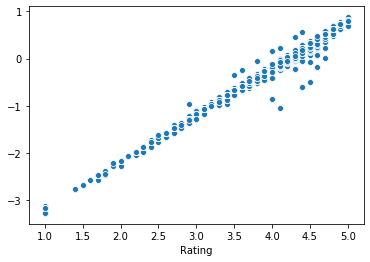

<IPython.core.display.Javascript object>

In [49]:
sns.scatterplot(y_train, model.resid)

In [51]:
y_pred = model.predict(X_const)

<IPython.core.display.Javascript object>

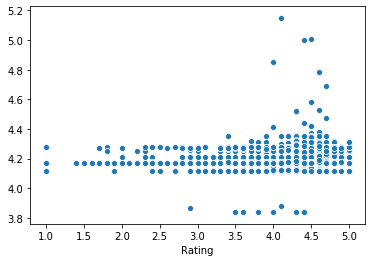

<IPython.core.display.Javascript object>

In [52]:
sns.scatterplot(y_train, y_pred)

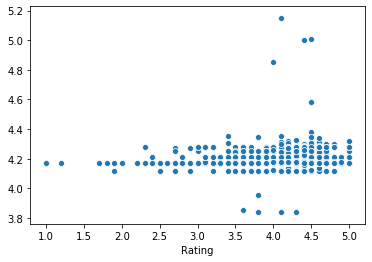

<IPython.core.display.Javascript object>

In [54]:
y_pred = model.predict(sm.add_constant(X_test))
sns.scatterplot(y_test, y_pred)

Scale your predictors and refit the linear model.

* How does this change the coefficients?
* How does this change the coefficients' p values?
* How does this change model performance?

In [55]:
from sklearn.preprocessing import StandardScaler

<IPython.core.display.Javascript object>

In [59]:
# answer below:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scl = scaler.transform(X_train)
X_test_scl = scaler.transform(X_test)

<IPython.core.display.Javascript object>

In [60]:
X_train_scl = pd.DataFrame(X_train_scl, columns=X_train.columns, index=X_train.index)
X_test_scl = pd.DataFrame(X_test_scl, columns=X_test.columns, index=X_test.index)

<IPython.core.display.Javascript object>

In [61]:
X_train_const = sm.add_constant(X_train_scl)
X_test_const = sm.add_constant(X_test_scl)

model = sm.OLS(y_train, X_train_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     13.09
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           8.64e-15
Time:                        08:52:12   Log-Likelihood:                -5611.7
No. Observations:                7489   AIC:                         1.124e+04
Df Residuals:                    7482   BIC:                         1.129e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           4.1913      0.006    708.218      0.000       4.180       4.203
Reviews                         0.0365      0.006      6.121      0.000       0.025       0.048
Price                          -0.0161      0.006     -2.651      0.008      -0.028      -0.004
Type_Paid                       0.0271      0.006      4.460      0.000       0.015       0.039
Content Rating_Everyone 10+     0.0153      0.006      2.562      0.010       0.004       0.027
Content Rating_Mature 17+      -0.0120      0.006     -2.021      0.043      -0.024      -0.000
Content Rating_Teen             0.0120      0.006      2.002      0.045       0.000       0.024
==============================================================================
Omnibus:                     2902.087   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14269.988
Skew:                          -1.825   Prob(JB):                         0.00
Kurtosis:                       8.693   Cond. No.                         1.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>

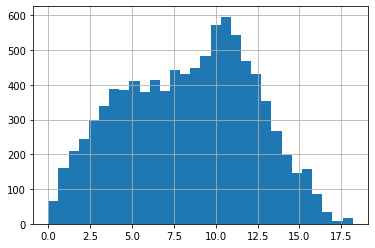

<IPython.core.display.Javascript object>

In [64]:
np.log(reviews["Reviews"]).hist(bins=30)

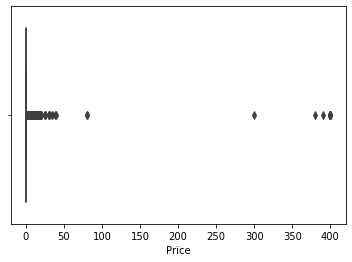

<IPython.core.display.Javascript object>

In [66]:
sns.boxplot(reviews["Price"])